In [3]:
# Import necessary libraries and packages
import pandas as pd
from pandas import Series, DataFrame

In [6]:
# Get working directory
import os
os.getcwd()

# Set working direction
os.chdir('C:\Users\Sandra\datascience')

In [7]:
# Load datasets
titanic_df = pd.read_csv('train.csv')

In [8]:
# Preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

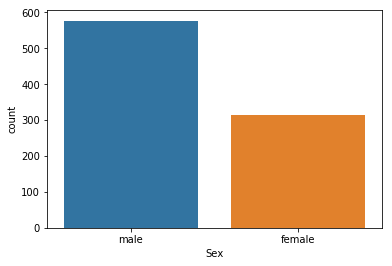

In [14]:
sns.countplot('Sex', data=titanic_df)

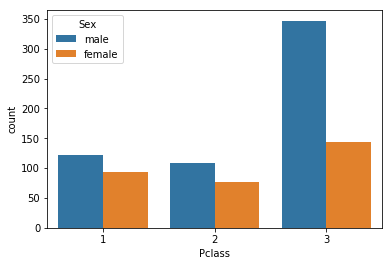

In [16]:
# Separate classes by gender
sns.countplot('Pclass', data=titanic_df, hue='Sex')

In [18]:
# Determine which passengers are children. Will be used for new column called person.
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [20]:
# Define new column called person
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child,axis=1)

In [23]:
titanic_df[1:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


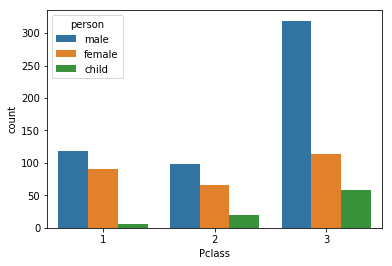

In [26]:
sns.countplot('Pclass', data=titanic_df, hue='person')

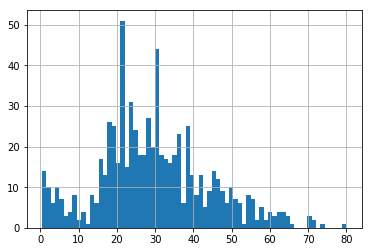

In [27]:
# Look at distribution of ages
titanic_df['Age'].hist(bins=70)

In [29]:
# Determine mean
titanic_df['Age'].mean()

29.69911764705882

In [31]:
#Get table of male vs female vs child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

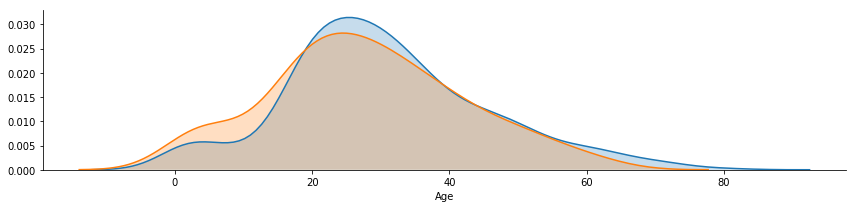

In [34]:
# Create a kde plot to show distribution of age broken down by male/ female
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
# Set x max limit to oldest age
#oldest = titanic_df['Age'].max()
#fig.set(xlim=(0, oldest))
#fig.add_legend()

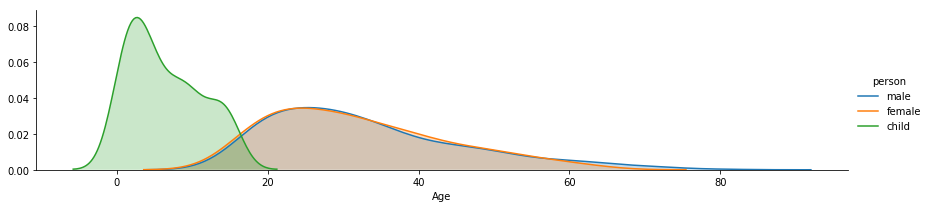

In [36]:
# Create a kde plot to show distribution of age broken down by male/ female/ child
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.add_legend()

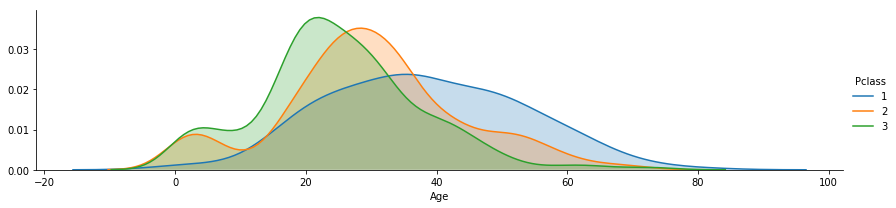

In [37]:
# Create a kde plot to show distribution of age broken down by class
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.add_legend()

In [39]:
deck = titanic_df['Cabin'].dropna()

In [40]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

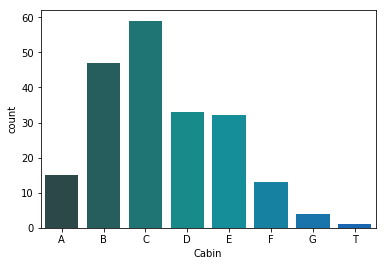

In [50]:
# Barplot of cabins and how many people are in them
# but dropped NA so removed significant # of observations
levels = []
for level in deck:
    levels.append(level[0]) 
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin', data=cabin_df, palette='winter_d', order=['A','B','C','D','E','F','G','T'])

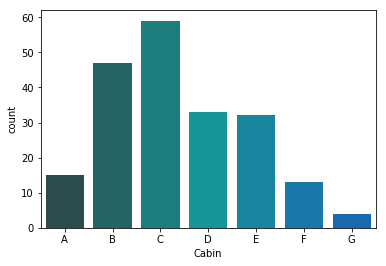

In [51]:
# Cabin T doesn't make sense so remove and replot
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin', data=cabin_df, palette='winter_d', order=['A','B','C','D','E','F','G'])

In [52]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


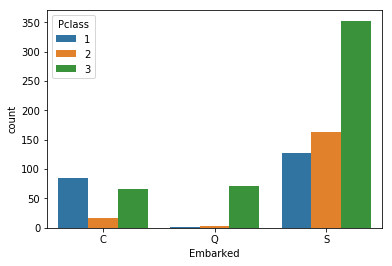

In [55]:
sns.countplot('Embarked', data=titanic_df, hue='Pclass', order=['C','Q','S'])

In [65]:
# Who was alone and who was with family?
# Need to add a new column using sibling column
# Columns with zero means they are alone
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [66]:
# Create the new column
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
titanic_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family


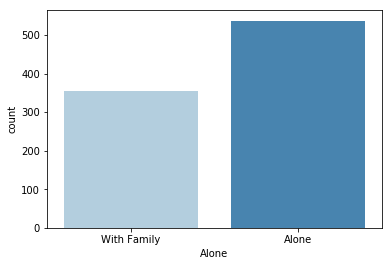

In [67]:
sns.countplot('Alone', data=titanic_df, palette='Blues')

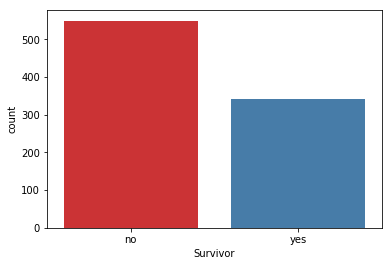

In [69]:
# Made a new column changing 1s and 0s to yes and no
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})
sns.countplot('Survivor', data=titanic_df, palette='Set1')
                                    

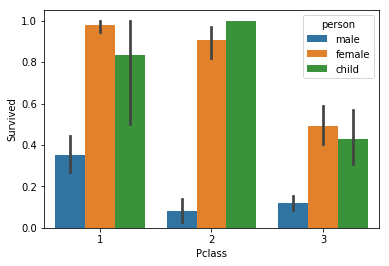

In [78]:
# Determine if class affected survival
sns.barplot('Pclass', 'Survived', data=titanic_df, hue='person')

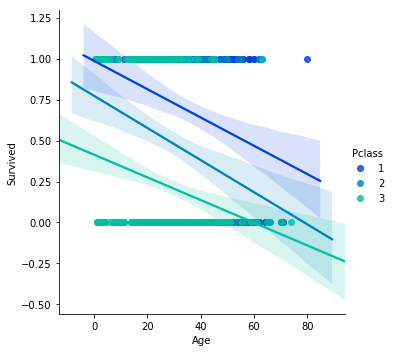

In [82]:
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='winter')

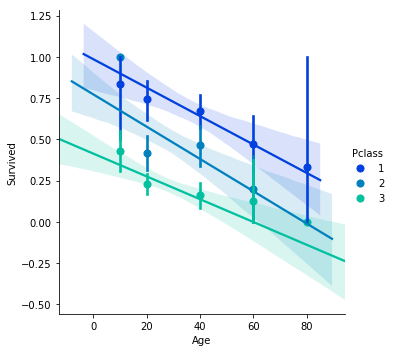

In [84]:
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='winter', x_bins=generations)

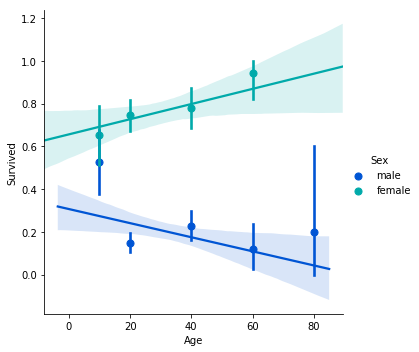

In [86]:
# See how gender and age relate to survival
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Sex', palette='winter', x_bins=generations)

In [89]:
conda install scikit-learn

SyntaxError: invalid syntax (<ipython-input-89-2ba64cbb7597>, line 1)